# Import Required Libraries
Import the necessary libraries, including pandas, numpy, scikit-learn, and any other required libraries.

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and Explore Dataset
Load the dataset from fdarecall.ipynb and perform initial exploration, including checking for missing values and understanding the structure of the data.

In [2]:
# Load and Explore Dataset


# Load the dataset from fdarecall.ipynb
df = pd.read_csv('recalls_from_db.csv')

# Display the first few rows of the dataset
df.head()

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display basic information about the dataset
df.info()

# Display summary statistics of the dataset
df.describe()

# Convert date columns to datetime format
df['Center Classification Date'] = pd.to_datetime(df['Center Classification Date'])
df['Termination Date'] = pd.to_datetime(df['Termination Date'])

# Calculate the duration between Center Classification Date and Termination Date
df['Duration'] = (df['Termination Date'] - df['Center Classification Date']).dt.days

# Display the first few rows with the new Duration column
df.head()

Missing values in each column:
 _id                           0
Address                       0
Center Classification Date    0
City                          0
Classification                0
Country                       0
Postal Code                   0
Recall Firm                   0
Recall Initiation Date        0
State                         0
Status                        0
Termination Date              0
Days To Classify              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   _id                         848 non-null    object
 1   Address                     848 non-null    object
 2   Center Classification Date  848 non-null    object
 3   City                        848 non-null    object
 4   Classification              848 non-null    object
 5   Country                     848 non-n

,_id,Address,Center Classification Date,City,Classification,Country,Postal Code,Recall Firm,Recall Initiation Date,State,Status,Termination Date,Days To Classify,Duration
0,674fa0f22ce31275be059aa8,2610 Homestead Pl,2020-04-13,Rancho Dominguez,Class III,United States,90220-5610,"Organic By Nature, Inc.",2020-02-24,CA,Terminated,2021-02-02,49,295
1,674fa0f22ce31275be059aa9,47 Bridgewater St # 57,2020-04-24,Brooklyn,Class III,United States,11222-3820,Rong Shing Trading NY Inc,2020-04-01,NY,Terminated,2021-03-18,23,328
2,674fa0f22ce31275be059aaa,2959 Salinas Hwy,2022-02-22,Monterey,Class I,United States,93940-6400,Dole Fresh Vegetables Inc,2022-01-06,CA,Terminated,2022-03-22,47,28
3,674fa0f22ce31275be059aab,262 E Main St,2022-07-19,Lovell,Class II,United States,82431-2102,"Queen Bee Gardens, LLC",2022-04-28,WY,Terminated,2023-01-17,82,182
4,674fa0f22ce31275be059aaf,1700 E Stroop Rd,2023-08-02,Dayton,Class II,United States,45429-5040,Cassanos Inc,2023-07-18,OH,Terminated,2023-09-27,15,56


# Preprocess Data
Preprocess the data by handling missing values, converting dates to datetime objects, and calculating the duration between the Center Classification Date and Termination Date.

In [3]:
# Preprocess Data

# Handle missing values by dropping rows with missing dates
df = df.dropna(subset=['Center Classification Date', 'Termination Date'])

# Convert date columns to datetime format (if not already done)
df['Center Classification Date'] = pd.to_datetime(df['Center Classification Date'])
df['Termination Date'] = pd.to_datetime(df['Termination Date'])

# Calculate the duration between Center Classification Date and Termination Date
df['Duration'] = (df['Termination Date'] - df['Center Classification Date']).dt.days

# Display the first few rows with the new Duration column
df.head()

,_id,Address,Center Classification Date,City,Classification,Country,Postal Code,Recall Firm,Recall Initiation Date,State,Status,Termination Date,Days To Classify,Duration
0,674fa0f22ce31275be059aa8,2610 Homestead Pl,2020-04-13,Rancho Dominguez,Class III,United States,90220-5610,"Organic By Nature, Inc.",2020-02-24,CA,Terminated,2021-02-02,49,295
1,674fa0f22ce31275be059aa9,47 Bridgewater St # 57,2020-04-24,Brooklyn,Class III,United States,11222-3820,Rong Shing Trading NY Inc,2020-04-01,NY,Terminated,2021-03-18,23,328
2,674fa0f22ce31275be059aaa,2959 Salinas Hwy,2022-02-22,Monterey,Class I,United States,93940-6400,Dole Fresh Vegetables Inc,2022-01-06,CA,Terminated,2022-03-22,47,28
3,674fa0f22ce31275be059aab,262 E Main St,2022-07-19,Lovell,Class II,United States,82431-2102,"Queen Bee Gardens, LLC",2022-04-28,WY,Terminated,2023-01-17,82,182
4,674fa0f22ce31275be059aaf,1700 E Stroop Rd,2023-08-02,Dayton,Class II,United States,45429-5040,Cassanos Inc,2023-07-18,OH,Terminated,2023-09-27,15,56


# Feature Engineering
Create new features that may be useful for the model, such as the month and year of the Center Classification Date.

In [4]:
# Feature Engineering

# Extract year and month from Center Classification Date
df['Center Classification Year'] = df['Center Classification Date'].dt.year
df['Center Classification Month'] = df['Center Classification Date'].dt.month

# Display the first few rows with the new features
df.head()

,_id,Address,Center Classification Date,City,Classification,Country,Postal Code,Recall Firm,Recall Initiation Date,State,Status,Termination Date,Days To Classify,Duration,Center Classification Year,Center Classification Month
0,674fa0f22ce31275be059aa8,2610 Homestead Pl,2020-04-13,Rancho Dominguez,Class III,United States,90220-5610,"Organic By Nature, Inc.",2020-02-24,CA,Terminated,2021-02-02,49,295,2020,4
1,674fa0f22ce31275be059aa9,47 Bridgewater St # 57,2020-04-24,Brooklyn,Class III,United States,11222-3820,Rong Shing Trading NY Inc,2020-04-01,NY,Terminated,2021-03-18,23,328,2020,4
2,674fa0f22ce31275be059aaa,2959 Salinas Hwy,2022-02-22,Monterey,Class I,United States,93940-6400,Dole Fresh Vegetables Inc,2022-01-06,CA,Terminated,2022-03-22,47,28,2022,2
3,674fa0f22ce31275be059aab,262 E Main St,2022-07-19,Lovell,Class II,United States,82431-2102,"Queen Bee Gardens, LLC",2022-04-28,WY,Terminated,2023-01-17,82,182,2022,7
4,674fa0f22ce31275be059aaf,1700 E Stroop Rd,2023-08-02,Dayton,Class II,United States,45429-5040,Cassanos Inc,2023-07-18,OH,Terminated,2023-09-27,15,56,2023,8


# Split Dataset into Training and Testing Sets
Split the dataset into training and testing sets using scikit-learn's train_test_split function.

In [5]:
# Split Dataset into Training and Testing Sets

# Define the feature columns and target column
X = df[['Center Classification Year', 'Center Classification Month']]
y = df['Duration']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (678, 2) (678,)
Testing set shape: (170, 2) (170,)


# Train the Model
Train a supervised model (e.g., Linear Regression, Random Forest) using the training set.

In [6]:
# Train the Model

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35673.14375590989
R-squared: 0.059194367001474624


# Evaluate the Model
Evaluate the model's performance using appropriate metrics such as Mean Absolute Error (MAE) and R-squared.

In [7]:
# Evaluate the Model

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

# Print Mean Absolute Error
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print R-squared
print("R-squared:", r2)

Mean Absolute Error: 143.5489764604961
R-squared: 0.059194367001474624


# Make Predictions
Use the trained model to make predictions on the testing set and compare the predicted durations with the actual durations.

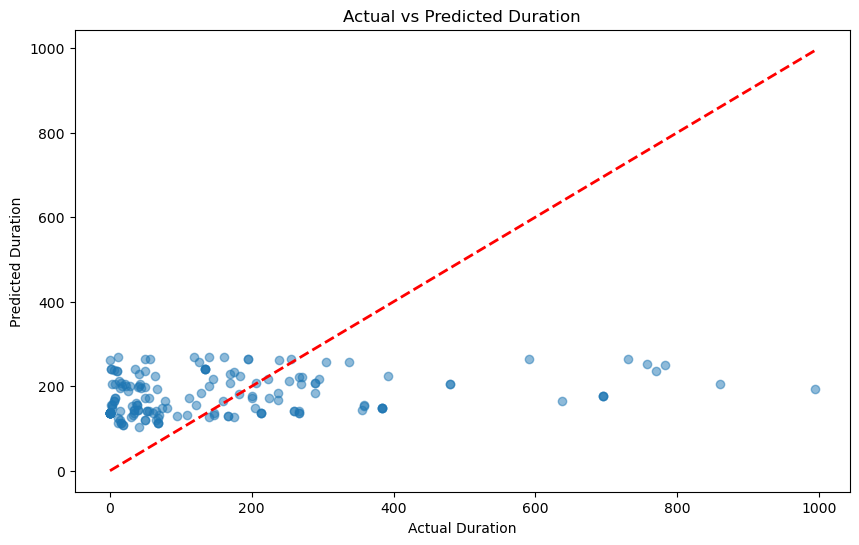

In [8]:
# Make Predictions

# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Create a DataFrame to compare the actual and predicted durations
comparison_df = pd.DataFrame({'Actual Duration': y_test, 'Predicted Duration': y_pred})

# Display the first few rows of the comparison DataFrame
comparison_df.head()

# Calculate the differences between actual and predicted durations
comparison_df['Difference'] = comparison_df['Actual Duration'] - comparison_df['Predicted Duration']

# Display the first few rows with the differences
comparison_df.head()

# Plot the actual vs predicted durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration')
plt.show()